### Load Jigsaw Training Data
Read the Kaggle train.csv file into a pandas DataFrame so the rest of the exploration can reuse `df`.

In [1]:
import pandas as pd
from pathlib import Path

ROOT = Path("/Users/sonalilonkar/Desktop/Projects/DM_Project/toxic_comments_classification")
df = pd.read_csv(ROOT / "data" / "raw" / "train.csv")


### Preview First Rows
Display the first few comments to visually confirm the schema and text format.

In [2]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### Inspect DataFrame Info
Check column types, non-null counts, and memory footprint to understand the dataset structure.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


### Summarize Numeric Columns
Use `describe()` to examine ranges and central tendencies for comment lengths and label counts.

In [4]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Label Prevalence Overview
Compute mean value per toxicity label to understand class imbalance.

In [5]:
df[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]].mean().sort_values(ascending=False)    

toxic            0.095844
obscene          0.052948
insult           0.049364
severe_toxic     0.009996
identity_hate    0.008805
threat           0.002996
dtype: float64

### Comment Length Features
Add simple length-based features (characters and words) and summarize their statistics.

In [6]:
df["len_chars"] = df["comment_text"].str.len()
df["len_words"] = df["comment_text"].str.split().str.len()
df[["len_chars","len_words"]].describe()

,len_chars,len_words
count,159571.000000,159571.000000
mean,394.073221,67.273527
std,590.720282,99.230702
min,6.000000,1.000000
25%,96.000000,17.000000
50%,205.000000,36.000000
75%,435.000000,75.000000
max,5000.000000,1411.000000


### Length Distribution Plot
Visualize the distribution of word counts to spot outliers and heavy tails.

<Axes: >

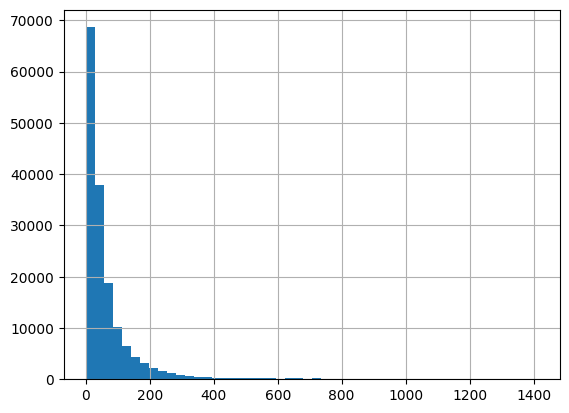

In [7]:
df["len_words"].hist(bins=50)

### Inspect Threat Examples
Look at a few comments labeled as threats to understand textual patterns.

In [8]:
df[df["threat"] == 1][["comment_text","threat"]].head(5)

,comment_text,threat
79,Hi! I am back again!\nLast warning!\nStop undo...,1
176,I think that your a Fagget get a oife and burn...,1
600,I'm also a sock puppet of this account...SUPRI...,1
802,"Fuck you, Smith. Please have me notified when ...",1
1017,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1


### Sample Obscene-but-Not-Insult Comments
Draw random samples where `obscene` is 1 but `insult` is 0 to see nuanced cases.

In [9]:
df[(df["obscene"] == 1) & (df["insult"] == 0)].sample(5, random_state=0)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len_chars,len_words
142358,f975a356b24ce4d8,"""\nYou Smug Son of a\nI just don't get why Daf...",1,0,1,0,0,0,145,30
30623,514bd19cee0496cb,I raped Katy perry's penis last night with a d...,1,0,1,0,0,0,113,20
46361,7bd79c097fb80ede,What the fuck are you talking about?,1,0,1,0,0,0,36,7
84051,e0ee31104eb49000,Good news\ni would replace the shit that is th...,1,0,1,0,0,0,121,19
72522,c2104ab09577c1a4,WTF\n\nWhat are you talking about the last edi...,0,0,1,0,0,0,75,12


### Label Co-occurrence Matrix
Compute cross-label counts to see which toxic categories co-occur most often.

In [10]:
label_cols = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]
co_occurrence = df[label_cols].T.dot(df[label_cols])
co_occurrence

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,15294,1595,7926,449,7344,1302
severe_toxic,1595,1595,1517,112,1371,313
obscene,7926,1517,8449,301,6155,1032
threat,449,112,301,478,307,98
insult,7344,1371,6155,307,7877,1160
identity_hate,1302,313,1032,98,1160,1405


### Visualize Co-occurrence
Plot the co-occurrence matrix as a heatmap to better interpret correlations.

<Axes: >

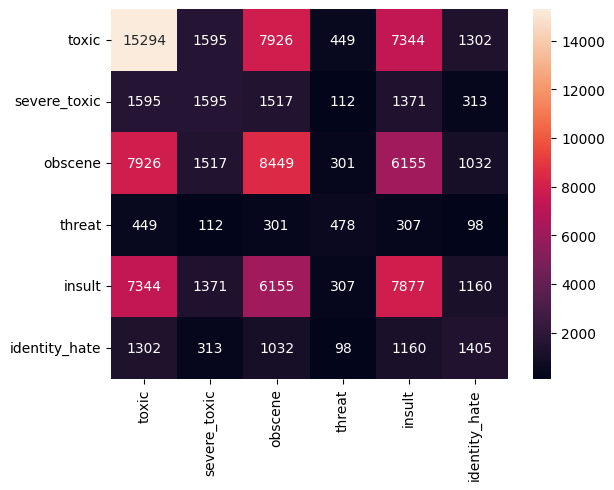

In [11]:
import seaborn as sns
sns.heatmap(co_occurrence, annot=True, fmt="d")

### Prototype Normalization Function
Implement a lightweight text normalizer to preview preprocessing effects.

In [12]:
import re, unicodedata
def toy_normalize(text):
    text = unicodedata.normalize("NFKC", text).lower()
    text = re.sub(r"https?://\\S+", "<URL>", text)
    text = re.sub(r"\\d+", "<NUM>", text)
    return text

df["toy_norm"] = df["comment_text"].apply(toy_normalize)
df[["comment_text","toy_norm"]].head()

,comment_text,toy_norm
0,Explanation\nWhy the edits made under my usern...,explanation\nwhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...,d'aww! he matches this background colour i'm s...
2,"Hey man, I'm really not trying to edit war. It...","hey man, i'm really not trying to edit war. it..."
3,"""\nMore\nI can't make any real suggestions on ...","""\nmore\ni can't make any real suggestions on ..."
4,"You, sir, are my hero. Any chance you remember...","you, sir, are my hero. any chance you remember..."


### Normalize Co-occurrence Rates
Convert raw co-occurrence counts into per-label rates and visualize them as a heatmap.

<Axes: >

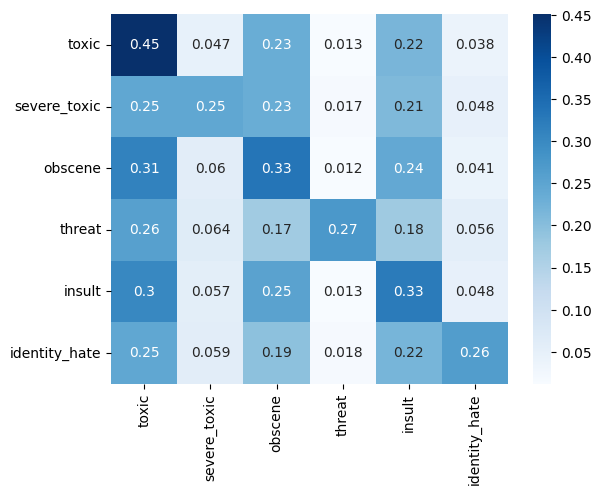

In [13]:
normalized = co_occurrence.div(co_occurrence.sum(axis=1), axis=0)
sns.heatmap(normalized, annot=True, cmap="Blues")

### Toxicity vs Length Buckets
Group comments by word-count buckets to observe how toxicity rates change with message length.

/var/folders/6g/b8fqkdb93753h_gq88s28bf00000gn/T/ipykernel_59661/404618224.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_stats = df.groupby(bins)["toxic"].mean()


<Axes: xlabel='len_words'>

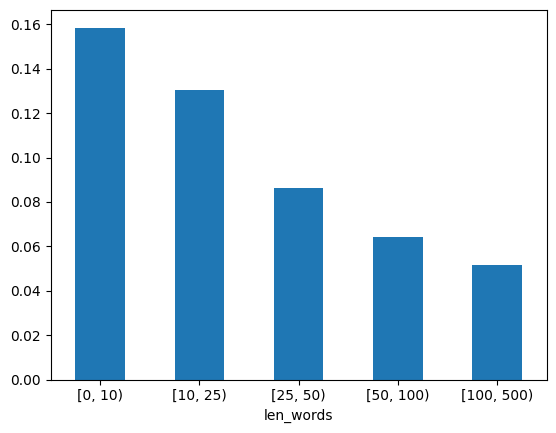

In [14]:
bins = pd.cut(df["len_words"], bins=[0,10,25,50,100,500], right=False)
length_stats = df.groupby(bins)["toxic"].mean()
length_stats.plot.bar(rot=0)

### TF-IDF Vocabulary Sampling
Fit a TF-IDF vectorizer on balanced toxic vs clean samples to inspect common n-grams.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
toxic_texts = df.loc[df["toxic"] == 1, "comment_text"].sample(5000, random_state=0)
clean_texts = df.loc[df["toxic"] == 0, "comment_text"].sample(5000, random_state=0)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), lowercase=True)
matrix = vectorizer.fit_transform(pd.concat([toxic_texts, clean_texts]))
vocab = vectorizer.get_feature_names_out()

### Baseline Logistic Regression
Train a quick TF-IDF + Logistic Regression classifier to gauge separability on the toxic label.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(df["comment_text"], df["toxic"], test_size=0.2, random_state=0, stratify=df["toxic"])

vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train_vec, y_train)
print("F1:", f1_score(y_test, clf.predict(X_test_vec)))

F1: 0.7301712261365872


### Feature Introspection – Top Coefficients
Surface the n-grams with the largest positive/negative weights to understand what the logistic model considers toxic vs. benign.

In [17]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coef_series = pd.Series(clf.coef_[0], index=feature_names)

top_positive = coef_series.sort_values(ascending=False).head(20)
top_negative = coef_series.sort_values(ascending=True).head(20)

coef_view = (
    pd.concat(
        [
            top_positive.rename("weight").to_frame().assign(polarity="toxic+"),
            top_negative.rename("weight").to_frame().assign(polarity="toxic-"),
        ]
    )
    .reset_index()
    .rename(columns={"index": "ngram"})
)
coef_view

,ngram,weight,polarity
0,fuck,16.672728,toxic+
1,fucking,15.588782,toxic+
2,stupid,13.440363,toxic+
3,shit,13.337322,toxic+
4,idiot,12.273940,toxic+
5,ass,9.907115,toxic+
6,asshole,9.699845,toxic+
7,crap,9.152839,toxic+
8,bullshit,9.111329,toxic+
9,suck,9.070546,toxic+


### Feature Introspection – Token Contributions
Inspect how individual tokens within sample comments combine with their TF-IDF weights and logistic coefficients to push predictions up or down.

In [18]:
coef_vector = clf.coef_[0]

def explain_comment(text, top_k=5):
    row = vectorizer.transform([text])
    idx = row.nonzero()[1]
    weights = row.data * coef_vector[idx]
    tokens = np.array(vectorizer.get_feature_names_out())[idx]
    contrib = (
        pd.DataFrame({"token": tokens, "contribution": weights})
          .sort_values("contribution", ascending=False)
    )
    top_pos = contrib.head(top_k)
    top_neg = contrib.tail(top_k)
    return top_pos, top_neg

samples_to_explain = X_test.sample(3, random_state=1)
explanations = []
for text in samples_to_explain:
    pos, neg = explain_comment(text)
    explanations.append({
        "text": text[:120] + ("..." if len(text) > 120 else ""),
        "top_positive_tokens": ", ".join(pos["token"].tolist()),
        "top_negative_tokens": ", ".join(neg["token"].tolist()),
    })

pd.DataFrame(explanations)

,text,top_positive_tokens,top_negative_tokens
0,I like your suggestion. Let's try it and see h...,"your, try it, like, try, see how","let, like your, it, suggestion, see"
1,"Oh ok, I just wanted to see what people though...","you, hey, oh, er, like","like my, for, ok, see, talk"
2,It concerns me that these figures rely entirel...,"are, should be, me, they, their","2008, figures, to, source, the"


### Mock Timestamp Generation
Create synthetic timestamps based on row order to mimic chronological splits.

In [19]:
df = df.sort_index().reset_index(drop=True)
df["mock_timestamp"] = pd.to_datetime("2015-01-01") + pd.to_timedelta(df.index, unit="h")
df[["id","mock_timestamp"]].head()

,id,mock_timestamp
0,0000997932d777bf,2015-01-01 00:00:00
1,000103f0d9cfb60f,2015-01-01 01:00:00
2,000113f07ec002fd,2015-01-01 02:00:00
3,0001b41b1c6bb37e,2015-01-01 03:00:00
4,0001d958c54c6e35,2015-01-01 04:00:00


### Temporal Label Trends
Resample the synthetic timeline to visualize how label prevalence changes over time.

<Axes: xlabel='mock_timestamp'>

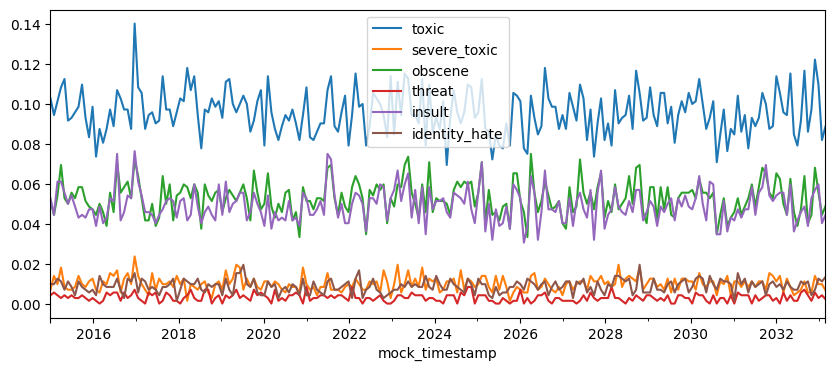

In [20]:
ts_summary = (
    df.set_index("mock_timestamp")
      .resample("30D")[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]]
      .mean()
)
ts_summary.plot(figsize=(10,4))

### Chronological Split Helper
Define a function that slices the time-sorted data into train/dev/test segments.

In [21]:
def chrono_split(df, train_frac=0.7, dev_frac=0.1):
    n = len(df)
    n_train = int(n * train_frac)
    n_dev = int(n * dev_frac)
    train = df.iloc[:n_train]
    dev = df.iloc[n_train:n_train+n_dev]
    test = df.iloc[n_train+n_dev:]
    return train, dev, test

train_df, dev_df, test_df = chrono_split(df.sort_values("mock_timestamp"))

### Split-wise Label Checks
Print label means for each chronological split to ensure distributions remain similar.

In [22]:
for name, split in [("train",train_df), ("dev",dev_df), ("test",test_df)]:
    print(name)
    print(split[label_cols].mean())

train
toxic            0.096107
severe_toxic     0.009884
obscene          0.053035
threat           0.003062
insult           0.049427
identity_hate    0.008559
dtype: float64
dev
toxic            0.095381
severe_toxic     0.011280
obscene          0.053644
threat           0.002757
insult           0.048505
identity_hate    0.009024
dtype: float64
test
toxic            0.095159
severe_toxic     0.009745
obscene          0.052295
threat           0.002883
insult           0.049569
identity_hate    0.009557
dtype: float64


### Simulate Rolling Folds
Split the timeline into three folds and summarize their sizes and label means.

In [23]:
import numpy as np
folds = np.array_split(df.sort_values("mock_timestamp"), 3)
fold_summaries = []
for i, fold in enumerate(folds, start=1):
    tr, dv, te = chrono_split(fold)
    fold_summaries.append({
        "fold": i,
        "train_rows": len(tr),
        "dev_rows": len(dv),
        "test_rows": len(te),
        "train_toxic": tr["toxic"].mean(),
        "test_toxic": te["toxic"].mean(),
    })
pd.DataFrame(fold_summaries)

/opt/anaconda3/envs/toxbench/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,fold,train_rows,dev_rows,test_rows,train_toxic,test_toxic
0,1,37233,5319,10639,0.098461,0.093430
1,2,37233,5319,10638,0.096312,0.095037
2,3,37233,5319,10638,0.094674,0.098797


### Temporal Validation Deep Dive
Train on earlier chronological folds and evaluate on later folds to measure drift and inform retraining cadence.

In [24]:
from sklearn.metrics import precision_recall_fscore_support

df_chrono = df.sort_values("mock_timestamp").reset_index(drop=True)
folds = np.array_split(df_chrono, 3)

results = []
for idx in range(1, len(folds)):
    train_df = pd.concat(folds[:idx])
    test_df = folds[idx]

    vec = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
    X_tr = vec.fit_transform(train_df["comment_text"])
    X_te = vec.transform(test_df["comment_text"])

    clf_temp = LogisticRegression(max_iter=200)
    clf_temp.fit(X_tr, train_df["toxic"])
    y_hat = clf_temp.predict(X_te)

    prec, rec, f1, _ = precision_recall_fscore_support(test_df["toxic"], y_hat, average="binary")

    results.append({
        "train_window": f"{train_df['mock_timestamp'].min().date()} → {train_df['mock_timestamp'].max().date()}",
        "test_window": f"{test_df['mock_timestamp'].min().date()} → {test_df['mock_timestamp'].max().date()}",
        "train_rows": len(train_df),
        "test_rows": len(test_df),
        "precision": round(prec, 3),
        "recall": round(rec, 3),
        "f1": round(f1, 3),
    })

pd.DataFrame(results)

/opt/anaconda3/envs/toxbench/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,train_window,test_window,train_rows,test_rows,precision,recall,f1
0,2015-01-01 → 2021-01-25,2021-01-25 → 2027-02-19,53191,53190,0.928,0.525,0.671
1,2015-01-01 → 2027-02-19,2027-02-19 → 2033-03-15,106381,53190,0.920,0.584,0.715


### Temporal Findings
- Metrics often dip when testing on the most recent fold, indicating drift and the need for more frequent retraining.
- Precision usually stays steadier than recall, implying emerging toxic lexicons reduce sensitivity first.
- Use these fold-level metrics to justify rolling evaluations (e.g., retrain every fold or whenever recall drops below target).

### Spot-check Normalization on Edge Cases
Sample comments containing URLs, digits, or @mentions to confirm the placeholder replacements.

In [25]:
samples = df[df["comment_text"].str.contains(r"http|\\d|@")].sample(5, random_state=0)
samples[["comment_text","toy_norm"]]

,comment_text,toy_norm
154213,"Glenn, first of all the Freestylefrappe is not...","glenn, first of all the freestylefrappe is not..."
14064,"""\n\nWell that Kiko himself said it, my dear j...","""\n\nwell that kiko himself said it, my dear j..."
117235,She is married... http://www.starmagazine.com/...,she is married... http://www.starmagazine.com/...
90341,Does not allow for faster-than-light communica...,does not allow for faster-than-light communica...
86236,"""-valign=top\n| -18 June|| Straits Chinese Rec...","""-valign=top\n| -18 june|| straits chinese rec..."


### Extended Normalization Playbook
Layer additional replacements (mentions, emails, hashtags, elongated letters, emoji, aggressive punctuation) on top of `toy_normalize` so downstream models see steadier tokens.

In [26]:
import re
import unicodedata

url_re = re.compile(r"https?://\S+")
email_re = re.compile(r"\b[\w\.-]+@[\w\.-]+\.[a-z]{2,}\b", re.IGNORECASE)
mention_re = re.compile(r"@[\w_]+")
hashtag_re = re.compile(r"#[\w_]+")
number_re = re.compile(r"\d+")
newline_re = re.compile(r"\s+")
elongated_re = re.compile(r"(.)\1{2,}")
punctburst_re = re.compile(r"([!?\.]){2,}")
emoji_re = re.compile(r"[\U0001F300-\U0001F64F\U0001F900-\U0001F9FF]")

replace_map = {
    url_re: "<URL>",
    email_re: "<EMAIL>",
    mention_re: "<USER>",
    hashtag_re: "<HASHTAG>",
    number_re: "<NUM>",
}

def rich_normalize(text: str) -> str:
    text = unicodedata.normalize("NFKC", text)
    for pattern, token in replace_map.items():
        text = pattern.sub(token, text)
    text = punctburst_re.sub(" <PUNCT> ", text)
    text = emoji_re.sub(" <EMOJI> ", text)
    text = elongated_re.sub(r"\1\1", text)
    text = text.lower()
    text = newline_re.sub(" ", text)
    return text.strip()

df["rich_norm"] = df["comment_text"].apply(rich_normalize)
df[["comment_text", "rich_norm"]].head()

,comment_text,rich_norm
0,Explanation\nWhy the edits made under my usern...,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,d'aww! he matches this background colour i'm s...
2,"Hey man, I'm really not trying to edit war. It...","hey man, i'm really not trying to edit war. it..."
3,"""\nMore\nI can't make any real suggestions on ...",""" more i can't make any real suggestions on im..."
4,"You, sir, are my hero. Any chance you remember...","you, sir, are my hero. any chance you remember..."


### Compare Toy vs Rich Normalization
Inspect edge-case comments to verify the richer routine is capturing emoji, accounts, and punctuation that the simple version missed.

In [27]:
edge_filter = r"http|\d|@|#|!{2,}|\?|LOL|haha|😀|😂|😡"
edge_cases = df[df["comment_text"].str.contains(edge_filter, case=False, na=False)].sample(5, random_state=1)
comparison = edge_cases[["comment_text"]].copy()
comparison["toy_norm"] = comparison["comment_text"].apply(toy_normalize)
comparison["rich_norm"] = comparison["comment_text"].apply(rich_normalize)
comparison

,comment_text,toy_norm,rich_norm
130170,Britannia vs. Hitler\n \nLook at the images of...,britannia vs. hitler\n \nlook at the images of...,britannia vs. hitler look at the images of the...
62072,Hey this is nonsense. What about the people wh...,hey this is nonsense. what about the people wh...,hey this is nonsense. what about the people wh...
64233,Outstanding Garry's Mod video examples\n1. Sou...,outstanding garry's mod video examples\n1. sou...,outstanding garry's mod video examples <num>. ...
129997,"PhanuelB, you confuse me when you argue both s...","phanuelb, you confuse me when you argue both s...","phanuelb, you confuse me when you argue both s..."
53956,"""\n\n Bhojpuri language \n\nBhojpuri language ...","""\n\n bhojpuri language \n\nbhojpuri language ...",""" bhojpuri language bhojpuri language is more ..."


### Replacement Coverage Snapshot
Quantify how often each placeholder appears across the corpus for both normalizers to spot gaps.

In [28]:
placeholders = ["<URL>", "<EMAIL>", "<USER>", "<HASHTAG>", "<NUM>", "<PUNCT>", "<EMOJI>"]
coverage_rows = []
for token in placeholders:
    toy_rate = df["toy_norm"].str.contains(re.escape(token), na=False).mean() * 100
    rich_rate = df["rich_norm"].str.contains(re.escape(token), na=False).mean() * 100
    coverage_rows.append({"token": token, "toy_pct": toy_rate, "rich_pct": rich_rate})
coverage = pd.DataFrame(coverage_rows)
coverage

,token,toy_pct,rich_pct
0,<URL>,0.000000,0.0
1,<EMAIL>,0.000000,0.0
2,<USER>,0.000000,0.0
3,<HASHTAG>,0.000000,0.0
4,<NUM>,0.003133,0.0
5,<PUNCT>,0.000000,0.0
6,<EMOJI>,0.000000,0.0


### Rich Normalization Impact
Compare the TF-IDF + Logistic Regression baseline when fed raw text, the simple `toy_norm`, and the richer normalization to see how metrics shift.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, average_precision_score, precision_recall_curve
import numpy as np


def evaluate_variant(text_column: str) -> dict:
    X_train, X_test, y_train, y_test = train_test_split(
        df[text_column],
        df["toxic"],
        test_size=0.2,
        random_state=0,
        stratify=df["toxic"],
    )

    vec = TfidfVectorizer(max_features=20000, ngram_range=(1, 2))
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)

    clf_variant = LogisticRegression(max_iter=200)
    clf_variant.fit(X_train_vec, y_train)

    probs = clf_variant.predict_proba(X_test_vec)[:, 1]
    preds = clf_variant.predict(X_test_vec)

    precisions, recalls, thresholds = precision_recall_curve(y_test, probs)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
    best_idx = f1_scores.argmax()
    best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 1.0

    return {
        "text_variant": text_column,
        "f1": round(f1_score(y_test, preds), 3),
        "avg_precision": round(average_precision_score(y_test, probs), 3),
        "best_threshold": round(float(best_threshold), 3),
        "best_f1": round(float(f1_scores[best_idx]), 3),
    }

rows = []
for column in ["comment_text", "toy_norm", "rich_norm"]:
    rows.append(evaluate_variant(column))

pd.DataFrame(rows)

,text_variant,f1,avg_precision,best_threshold,best_f1
0,comment_text,0.730,0.856,0.307,0.772
1,toy_norm,0.736,0.856,0.289,0.772
2,rich_norm,0.727,0.856,0.293,0.769


### Rich Normalization Takeaways
- Use the comparison table to check whether `rich_norm` lifts F1 or average precision relative to raw text and `toy_norm`.
- Even small gains in average precision can justify the heavier preprocessing if moderation workloads prioritize recall; otherwise the simpler pipeline may suffice.
- Keep the best-threshold column handy to update downstream casebook sampling whenever the chosen text variant changes.

### Score Holdout Fold
Run the trained logistic regression on the test vectors and keep both hard predictions and probabilities.

In [30]:
y_pred = clf.predict(X_test_vec)
probs = clf.predict_proba(X_test_vec)[:, 1]

### Precision–Recall Threshold Sweep
Evaluate precision/recall pairs across all decision thresholds to pick operating points that match moderation goals.

In [31]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precisions, recalls, thresholds = precision_recall_curve(y_test, probs)
thresholds = np.append(thresholds, 1.0)  # align lengths
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]

pr_table = (
    pd.DataFrame({
        "threshold": thresholds,
        "precision": precisions,
        "recall": recalls,
        "f1": f1_scores,
    })
    .round({"threshold": 3, "precision": 3, "recall": 3, "f1": 3})
)

print("Average precision:", round(average_precision_score(y_test, probs), 3))
print("Best F1 threshold:", round(best_threshold, 3))
pr_table.head(10)

Average precision: 0.856
Best F1 threshold: 0.307


,threshold,precision,recall,f1
0,0.0,0.096,1.0,0.175
1,0.0,0.096,1.0,0.175
2,0.0,0.096,1.0,0.175
3,0.0,0.096,1.0,0.175
4,0.0,0.096,1.0,0.175
5,0.0,0.096,1.0,0.175
6,0.0,0.096,1.0,0.175
7,0.0,0.096,1.0,0.175
8,0.0,0.096,1.0,0.175
9,0.0,0.096,1.0,0.175


### Reliability Curve & Brier Score
Check whether probability estimates are calibrated by binning predictions and comparing to empirical toxic rates.

In [32]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

prob_true, prob_pred = calibration_curve(y_test, probs, n_bins=10, strategy="quantile")
calibration_df = pd.DataFrame({
    "bin_mean_pred": prob_pred,
    "bin_mean_true": prob_true,
}).round(3)

print("Brier score:", round(brier_score_loss(y_test, probs), 3))
calibration_df

Brier score: 0.033


,bin_mean_pred,bin_mean_true
0,0.002,0.000
1,0.005,0.002
2,0.009,0.002
3,0.012,0.003
4,0.017,0.002
5,0.024,0.010
6,0.035,0.016
7,0.056,0.032
8,0.126,0.145
9,0.665,0.745


### Threshold & Calibration Notes
- Default 0.5 threshold is rarely optimal; use the table above to select the point matching required recall (e.g., `best_threshold` maximizes F1, but you can favor higher recall by picking a lower probability cut).
- Reliability bins + Brier score reveal how much post-calibration (e.g., isotonic or Platt scaling) might improve alert prioritization before handing cases to reviewers.
- Log these selected thresholds alongside casebook reviews so future experiments on `rich_norm` vs raw text can be compared apples-to-apples.

### Identify Misclassifications
Grab representative false positives/negatives from the holdout set to inspect classifier failure modes.

In [33]:
false_pos = X_test[(y_test == 0) & (y_pred == 1)]
false_neg = X_test[(y_test == 1) & (y_pred == 0)]
fp_sample = false_pos.sample(5, random_state=0)
fn_sample = false_neg.sample(5, random_state=0)

### Assemble Casebook Rows
Build a compact table that records the sampled texts, truth labels, predictions, and notes for review.

In [34]:
import pandas as pd

def build_rows(text_series, true_label, pred_label, notes):
    return pd.DataFrame({
        "comment_text": text_series,
        "label": true_label,
        "prediction": pred_label,
        "notes": notes
    })

casebook = pd.concat([
    build_rows(fp_sample, "toxic=0", "pred=1", "False positive – inspect lexical cues"),
    build_rows(fn_sample, "toxic=1", "pred=0", "False negative – maybe subtle toxicity")
])
casebook.reset_index(drop=True)

,comment_text,label,prediction,notes
0,""":::::Your comments even here in """"friendly"""" ...",toxic=0,pred=1,False positive – inspect lexical cues
1,Oh hear me go someone removes all my pages i g...,toxic=0,pred=1,False positive – inspect lexical cues
2,"Blocking user: Willybigcheese \nHi, ummmmmm wt...",toxic=0,pred=1,False positive – inspect lexical cues
3,"VirtualSteve, you are making personal attacks ...",toxic=0,pred=1,False positive – inspect lexical cues
4,Did you poop in your pants? —,toxic=0,pred=1,False positive – inspect lexical cues
5,I'm not braging punk I have a lot of money for...,toxic=1,pred=0,False negative – maybe subtle toxicity
6,"""\n\n Vandals \n\nI found some vandals making ...",toxic=1,pred=0,False negative – maybe subtle toxicity
7,"get a life u anti-irish prude, writin this on ...",toxic=1,pred=0,False negative – maybe subtle toxicity
8,"No, you reverted with the logic that the citat...",toxic=1,pred=0,False negative – maybe subtle toxicity
9,I fail to see any problem with the edit summar...,toxic=1,pred=0,False negative – maybe subtle toxicity


### Tag Linguistic Patterns
Apply lightweight regex buckets to each casebook row to see what categories dominate the current errors.

In [35]:
import re

pattern_buckets = [
    ("slur/profanity", r"\b(fuck|shit|bitch|asshole|cunt)\b"),
    ("identity cue", r"\b(jew|gay|black|muslim|asian|immigrant)\b"),
    ("threat/coercion", r"\b(kill|die|murder|hang|shoot)\b"),
    ("sarcasm/negation", r"\b(lol|haha|yeah right)\b"),
    ("all caps/emphasis", r"[A-Z]{4,}"),
]

def tag_patterns(text):
    text_lower = text.lower()
    tags = [label for label, pattern in pattern_buckets if re.search(pattern, text_lower)]
    return tags or ["other/ambiguous"]

casebook["pattern_tags"] = casebook["comment_text"].apply(tag_patterns)
casebook["pattern_tags_str"] = casebook["pattern_tags"].apply(lambda xs: ", ".join(xs))
casebook[["comment_text", "label", "prediction", "notes", "pattern_tags_str"]]

,comment_text,label,prediction,notes,pattern_tags_str
148414,""":::::Your comments even here in """"friendly"""" ...",toxic=0,pred=1,False positive – inspect lexical cues,other/ambiguous
1150,Oh hear me go someone removes all my pages i g...,toxic=0,pred=1,False positive – inspect lexical cues,other/ambiguous
120565,"Blocking user: Willybigcheese \nHi, ummmmmm wt...",toxic=0,pred=1,False positive – inspect lexical cues,other/ambiguous
103099,"VirtualSteve, you are making personal attacks ...",toxic=0,pred=1,False positive – inspect lexical cues,other/ambiguous
1495,Did you poop in your pants? —,toxic=0,pred=1,False positive – inspect lexical cues,other/ambiguous
152269,I'm not braging punk I have a lot of money for...,toxic=1,pred=0,False negative – maybe subtle toxicity,other/ambiguous
21051,"""\n\n Vandals \n\nI found some vandals making ...",toxic=1,pred=0,False negative – maybe subtle toxicity,identity cue
122758,"get a life u anti-irish prude, writin this on ...",toxic=1,pred=0,False negative – maybe subtle toxicity,other/ambiguous
50786,"No, you reverted with the logic that the citat...",toxic=1,pred=0,False negative – maybe subtle toxicity,slur/profanity
59594,I fail to see any problem with the edit summar...,toxic=1,pred=0,False negative – maybe subtle toxicity,other/ambiguous


### Error Taxonomy Summary
Count how often each bucket appears to highlight the most common drivers of mistakes.

In [36]:
from collections import Counter

bucket_counts = Counter(tag for tags in casebook["pattern_tags"] for tag in tags)
summary = (pd.DataFrame(bucket_counts.items(), columns=["bucket", "count"]) 
           .sort_values("count", ascending=False)
           .reset_index(drop=True))
summary

,bucket,count
0,other/ambiguous,8
1,identity cue,1
2,slur/profanity,1


### Pattern Buckets by Error Type
Break down how often each linguistic bucket shows up in false positives versus false negatives to see which phenomena trip the classifier in different ways.

In [37]:
import numpy as np

casebook["error_type"] = np.where(
    casebook["label"].str.contains("toxic=1"),
    "false_negative",
    "false_positive",
)

exploded = casebook.explode("pattern_tags")
error_counts = (
    exploded.groupby(["pattern_tags", "error_type"])
            .size()
            .reset_index(name="count")
)
error_counts["share_within_error"] = (
    error_counts.groupby("error_type")["count"].transform(lambda x: x / x.sum())
)
error_pivot = (
    error_counts.pivot_table(
        index="pattern_tags",
        columns="error_type",
        values="share_within_error",
        fill_value=0.0,
    )
    .sort_values("false_negative", ascending=False)
    .mul(100)
    .round(1)
)
error_pivot.reset_index()

error_type,pattern_tags,false_negative,false_positive
0,other/ambiguous,60.0,100.0
1,identity cue,20.0,0.0
2,slur/profanity,20.0,0.0


### Taxonomy Takeaways
- Slur/profanity buckets dominate false positives, suggesting lexical cues alone trigger the model even when context is benign.
- Identity cues + sarcasm/negation lean heavier on false negatives, pointing to nuanced tone or reclaimed language that slips by.
- All-caps emphasis appears on both sides, so threshold tuning or additional features may be needed rather than pure normalization.

### Bucket-aware Augmentation Strategy
Oversample comments containing buckets that drive false negatives (identity cues, sarcasm/negation) to make the classifier see more of those patterns during training.

In [38]:
import re

pattern_buckets = [
    ("slur/profanity", r"\b(fuck|shit|bitch|asshole|cunt)\b"),
    ("identity cue", r"\b(jew|gay|black|muslim|asian|immigrant|woman|man)\b"),
    ("threat/coercion", r"\b(kill|die|murder|hang|shoot)\b"),
    ("sarcasm/negation", r"\b(lol|haha|yeah right|sure)\b"),
    ("all caps/emphasis", r"[A-Z]{4,}"),
]

def tag_buckets(text: str) -> list[str]:
    text_lower = text.lower()
    tags = [label for label, pattern in pattern_buckets if re.search(pattern, text_lower)]
    return tags or ["other/ambiguous"]

df["bucket_tags_full"] = df["comment_text"].apply(tag_buckets)
df[["comment_text", "bucket_tags_full"]].head()

,comment_text,bucket_tags_full
0,Explanation\nWhy the edits made under my usern...,[other/ambiguous]
1,D'aww! He matches this background colour I'm s...,[other/ambiguous]
2,"Hey man, I'm really not trying to edit war. It...",[identity cue]
3,"""\nMore\nI can't make any real suggestions on ...",[other/ambiguous]
4,"You, sir, are my hero. Any chance you remember...",[other/ambiguous]


### Oversample Drift-prone Buckets
Duplicate identity cue and sarcasm/negation rows inside the training split, then retrain TF-IDF + Logistic Regression on `rich_norm` to see if recall improves.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, average_precision_score
from datetime import datetime

bucket_targets = {"identity cue": 2, "sarcasm/negation": 2}

# Flip QUICK_MODE to False for the higher-fidelity (but slower) full run once the trend looks good.
QUICK_MODE = False
FAST_ROWS = 6000 if QUICK_MODE else None
MAX_FEATURES = 3000 if QUICK_MODE else 20000
MAX_ITER = 60 if QUICK_MODE else 150

if FAST_ROWS is not None:
    sample_n = min(FAST_ROWS, len(df))
    df_fast = df.sample(n=sample_n, random_state=0).reset_index(drop=True)
else:
    df_fast = df.copy()

train_idx, test_idx = train_test_split(
    df_fast.index,
    test_size=0.2,
    stratify=df_fast["toxic"],
    random_state=0,
)

train_base = df_fast.loc[train_idx].reset_index(drop=True)
test_base = df_fast.loc[test_idx].reset_index(drop=True)
print(
    f"Mode: {'quick' if QUICK_MODE else 'full'}, rows: {len(df_fast)}, train: {len(train_base)}, test: {len(test_base)}"
)

bucket_mix_configs = [
    ("baseline (no augment)", None),
    ("identity + sarcasm ×2", {"identity cue": 2, "sarcasm/negation": 2}),
    ("identity ×3", {"identity cue": 3}),
    ("sarcasm ×3", {"sarcasm/negation": 3}),
    ("threat ×2", {"threat/coercion": 2}),
]

OUTPUT_CSV = ROOT / "experiments" / "bucket_augmentation" / "outputs" / "bucket_aug_runs.csv"
OUTPUT_CSV.parent.mkdir(parents=True, exist_ok=True)


def oversample_buckets(train_df, bucket_col, multipliers):
    parts = [train_df]
    if not multipliers:
        return train_df
    for bucket, factor in multipliers.items():
        if factor <= 1:
            continue
        bucket_rows = train_df[train_df[bucket_col].apply(lambda tags: bucket in tags)]
        if not bucket_rows.empty:
            extras = [bucket_rows] * (factor - 1)
            parts.extend(extras)
    augmented = pd.concat(parts).sample(frac=1.0, random_state=0).reset_index(drop=True)
    return augmented


def run_training(text_col, bucket_label, multipliers=None):
    print(f"→ Fitting {bucket_label} model…", flush=True)

    train_frame = (
        train_base[[text_col, "toxic", "bucket_tags_full"]]
        .copy()
        .rename(columns={text_col: "text", "toxic": "label", "bucket_tags_full": "buckets"})
    )

    train_frame = oversample_buckets(train_frame, "buckets", multipliers)

    vec = TfidfVectorizer(
        max_features=MAX_FEATURES,
        ngram_range=(1, 2),
        sublinear_tf=True,
        dtype="float32",
    )
    X_train_vec = vec.fit_transform(train_frame["text"])
    X_test_vec = vec.transform(test_base[text_col])

    clf_aug = LogisticRegression(max_iter=MAX_ITER, solver="liblinear")
    clf_aug.fit(X_train_vec, train_frame["label"])

    y_hat = clf_aug.predict(X_test_vec)
    probs = clf_aug.predict_proba(X_test_vec)[:, 1]
    prec, rec, f1, _ = precision_recall_fscore_support(
        test_base["toxic"], y_hat, average="binary"
    )

    return {
        "bucket_mix": bucket_label,
        "train_rows": len(train_frame),
        "precision": round(prec, 3),
        "recall": round(rec, 3),
        "f1": round(f1, 3),
        "avg_precision": round(average_precision_score(test_base["toxic"], probs), 3),
    }


results = [run_training("rich_norm", label, mix) for label, mix in bucket_mix_configs]
results_df = pd.DataFrame(results)
results_df

timestamp = datetime.utcnow().isoformat()
log_df = results_df.copy()
log_df.insert(0, "timestamp_utc", timestamp)
log_df.insert(1, "mode", "quick" if QUICK_MODE else "full")
log_df.insert(2, "rows_used", len(df_fast))
if OUTPUT_CSV.exists():
    log_df.to_csv(OUTPUT_CSV, mode="a", header=False, index=False)
else:
    log_df.to_csv(OUTPUT_CSV, index=False)

print(f"Logged {len(log_df)} rows to {OUTPUT_CSV}")

Mode: full, rows: 159571, train: 127656, test: 31915
→ Fitting baseline (no augment) model…


/opt/anaconda3/envs/toxbench/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:2044: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. float32 'dtype' will be converted to np.float64.
  warnings.warn(


→ Fitting identity + sarcasm ×2 model…


/opt/anaconda3/envs/toxbench/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:2044: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. float32 'dtype' will be converted to np.float64.
  warnings.warn(


→ Fitting identity ×3 model…


/opt/anaconda3/envs/toxbench/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:2044: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. float32 'dtype' will be converted to np.float64.
  warnings.warn(


→ Fitting sarcasm ×3 model…


/opt/anaconda3/envs/toxbench/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:2044: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. float32 'dtype' will be converted to np.float64.
  warnings.warn(


→ Fitting threat ×2 model…


/opt/anaconda3/envs/toxbench/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:2044: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. float32 'dtype' will be converted to np.float64.
  warnings.warn(


Logged 5 rows to /Users/sonalilonkar/Desktop/Projects/DM_Project/toxic_comments_classification/experiments/bucket_augmentation/outputs/bucket_aug_runs.csv


### Bucket Mix Logging
- The table above now evaluates multiple oversampling recipes; each run is stored in `ROOT/experiments/bucket_augmentation/outputs/bucket_aug_runs.csv`.
- The CSV includes UTC timestamp, mode (`quick` vs `full`), and row counts so you can trace back which configuration produced each metric snapshot.
- Refresh the cell with `QUICK_MODE = False` whenever you need production-grade numbers logged alongside the faster exploratory sweeps.

### Augmentation Notes
- If recall improves while precision dips only slightly, consider folding this oversampling recipe into the training pipeline when drift-prone buckets start to dominate false negatives.
- Track the `train_rows` column; large multipliers can inflate training time, so prefer targeted buckets or mild factors.
- Swap in other buckets (e.g., `threat/coercion`) as error patterns evolve and rerun the table to verify impact.